##**SHETH L.U.J. COLLEGE OF ARTS & SIR M.V. COLLEGE OF SCIENCE & COMMERCE**

**Support Vector Machines (SVM)
1 Implement the SVM algorithm for binary classification.
2 Train an SVM model using a given dataset and optimize its parameters.
3 Evaluate the performance of the SVM model on test data and analyze the
results.**

### **Bhumika Shelar | T114**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
#Load the dataset
df = pd.read_csv("/content/sneakers_streetwear_sales_data.csv")
df.shape

(353, 11)

In [ ]:
df.head()

,Date,Product Name,Product Type,Brand,Gender,Category,Country,Quantity,Unit Price ($),Amount ($),Payment Mode
0,2022-05-27,Fear of God Essentials Tee,T-shirt,Essentials,Unisex,Limited Edition,Japan,5,141.82,709.10,Card
1,2022-08-22,Yeezy Boost 350,Sneakers,Adidas,Unisex,Streetwear,USA,2,267.34,534.68,Cash on Delivery
2,2022-04-03,Nike Dunk Low,Sneakers,Nike,Women,Limited Edition,Germany,1,292.00,292.00,Cash on Delivery
3,2022-07-13,Nike Tech Fleece,Hoodie,Nike,Men,Limited Edition,USA,4,245.44,981.76,Cash on Delivery
4,2022-08-25,Jordan 1 High,Sneakers,Nike,Women,Casual,Australia,2,184.51,369.02,Cash on Delivery


In [ ]:
# Drop missing values
df = df.dropna()

from sklearn.preprocessing import LabelEncoder

# Apply label encoding to all object (categorical) columns
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [ ]:
# Define features (X) and target (y)
X = df.drop(['price', 'Unit Price ($)', 'Amount ($)', 'Date'], axis=1)
y = df['price']

In [ ]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train SVR model
svr = SVR(kernel='rbf', C=100, epsilon=1.0)
svr.fit(X_train, y_train)

# Predict
y_pred = svr.predict(X_test)

In [ ]:
# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: -0.2532285974332513
MAE: 70.94693174658167
RMSE: 83.5485831739465


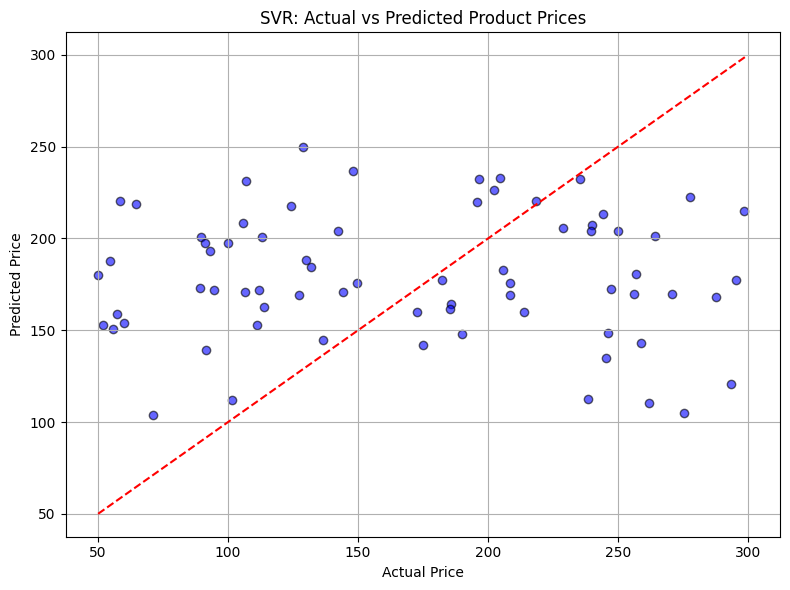

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k', alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("SVR: Actual vs Predicted Product Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Reference line
plt.grid(True)
plt.tight_layout()
plt.show()